# Insper - 2021.1

# Projeto 2 - Ciência dos dados

#### Professores: Maria Kelly Venezuela, Bárbara Agena

#### Alunos: Letícia Teles Machado, Pedro Henrique Britto Aragão Andrade, Thiago Shiguero Kawahara

# Introdução

Chocolate é um produto alimentício conhecido e amado por todos. É composto primordialmente por cacau, gordura e açúcar, mas apresenta infinitas possibilidades de tipos e sabores (como amargo, branco e menta) que variam tanto pelo tipo de ingredientes usados como técnicas de preparo. Por conta dessa variedade, os chocolates acabam se diferenciando e uns acabam sendo melhores do que outros. E é ai que entra o rating de chocolate, uma avaliação de 1 a 4 que julga a qualidade do chocolate. Nesse projeto estamos interessados na diferença dos chocolates de nota 3.5 a 4, por isso propomos o seguinte desafio: `a partir de determinadas informações, prever se um chocolate recebe um rating de 3.5 para cima ou não`.

# Importação de bibliotecas

Importando as bibliotecas que serão utilizados no projeto

In [1]:
# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

# Manipulação dos dados
import pandas as pd
import numpy as np

# Plotagem de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Predição
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest

# Matriz de confusão
from sklearn.metrics import plot_confusion_matrix

# Dataset

A base de dados foi retirada do site Kaggle que pode ser encontrado nesse [link](https://www.kaggle.com/soroushghaderi/chocolate-bar-2020).

In [2]:
# Abrindo o dataset
dados_cru= pd.read_csv("chocolate.csv")
dados_cru

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,2219,1205,Zotter,Austria,2014,Blend,Raw,80.0,2.75,4,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,2220,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,2221,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,2222,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


# Limpeza do dataset

Antes de iniciarmos qualquer análise, temos que ajeitar o dataset para o nosso interesse.

In [3]:
# Contagem de células vazias de cada coluna
dados_cru.isnull().sum()

Unnamed: 0                             0
ref                                    0
company                                0
company_location                       0
review_date                            0
country_of_bean_origin                 0
specific_bean_origin_or_bar_name       0
cocoa_percent                          0
rating                                 0
counts_of_ingredients                  0
beans                                  0
cocoa_butter                           0
vanilla                                0
lecithin                               0
salt                                   0
sugar                                  0
sweetener_without_sugar                0
first_taste                            0
second_taste                          77
third_taste                          620
fourth_taste                        1982
dtype: int64

Percebe-se que não só existem informações irrelevantes para o nosso tema no dataset como há colunas com falta de informações, então iremos removê-los.

In [4]:
# Filtrando as colunas
dados= dados_cru.iloc[:, [8, 5, 7, 3, 9, 11, 12, 13, 17]]

Ajeitando a coluna rating para o nosso interesse

In [5]:
dados.loc[dados.rating<3.5, "rating"]= 0
dados.loc[dados.rating>=3.5, "rating"]= 1

Traduzindo o dataset para o português.

In [6]:
# Renomeando as colunas
dados= dados.rename(columns= {"company": "cia", "company_location": "local_cia", "country_of_bean_origin": "país_grão",
                      "cocoa_percent": "%cacau", "counts_of_ingredients": "num_ingr", "cocoa_butter": "manteiga_cacau",
                      "vanilla": "baunilha", "lecithin": "lecitina", "first_taste": "1_sabor", "second_taste": "2_sabor"})

Sobre a coluna local_cia:

In [7]:
dados.local_cia.value_counts()

U.S.A                    948
France                   167
Canada                   158
U.k.                     117
Italy                     67
                        ... 
St.vincent-grenadines      1
Suriname                   1
Russia                     1
Martinique                 1
Wales                      1
Name: local_cia, Length: 66, dtype: int64

Pelo value_counts percebemos que há uma grande discrêpancia de quantidade de chocolates dos U.S.A. e do resto do mundo e também existe uma larga variedade de países, com 66 no total. Portanto classificamos a coluna local_cia em ser U.S.A. ou não.

In [8]:
dados.loc[dados.local_cia!= "U.S.A", "local_cia"]= 0
dados.loc[dados.local_cia== "U.S.A", "local_cia"]= 1

Sobre a coluna país_grão:

In [9]:
dados.país_grão.value_counts().head(10)

Venezuela             238
Peru                  207
Dominican republic    200
Ecuador               194
Madagascar            157
Blend                 140
Nicaragua              92
Brazil                 74
Bolivia                71
Belize                 65
Name: país_grão, dtype: int64

Pelo value_counts percebemos que há uma grande concentração de grãos originários dos países da América Latina, então categorizamos a coluna em pertencente a América Latina ou não.

In [10]:
# dicionario para categorizar os países dos grãos em pertencentes da América Latina ou não
dicio2= {
    
    0: ['Madagascar','Dominican republic','Tanzania','Papua new guinea','Burma','Togo','Sao tome','Fiji','Vanuatu','Indonesia',
        'Trinidad','Vietnam','Ghana','Blend','Grenada','Jamaica','India','Congo','Philippines','Solomon islands','Uganda',
        'Malaysia','Sri lanka','Ivory coast','Gabon','Taiwan','St. lucia','Australia','Liberia','Sierra leone','Nigeria',
        'U.s.a.','St.vincent-grenadines','Thailand','Tobago','Sumatra','Cameroon','Samoa','Sao tome & principe','Principe',
        'Sulawesi','Dr congo'],
    
    1: ['Peru','Bolivia','Venezuela','Ecuador','Brazil','Panama','Colombia','Cuba','Mexico','Nicaragua','Belize','Guatemala',
         'Costa rica','Honduras','Haiti','Puerto rico','Martinique','Bolvia','El salvador','Suriname']
}

# Substituindo os países dos grãos pelas suas categorias
for i in list(dados["país_grão"]):
    if i in dicio2[1]:
        dados.loc[dados["país_grão"]==i,"país_grão"]= 1
    elif i in dicio2[0]:
        dados.loc[dados["país_grão"]==i,"país_grão"]= 0

Sobre a coluna %cacau:

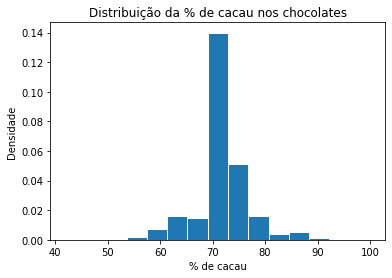

In [11]:
plt.hist(dados["%cacau"], bins=15, density=True, edgecolor= "white")
plt.title("Distribuição da % de cacau nos chocolates")
plt.ylabel("Densidade")
plt.xlabel("% de cacau");

Pelo histograma percebesse que há uma grande concentração de chocolates com 70% de cacau, então categorizamos a coluna em porcentagem de cacau igual a 70 ou não.

In [12]:
dados.loc[dados["%cacau"]!= 70, "%cacau"]= 0
dados.loc[dados["%cacau"]== 70, "%cacau"]= 1

Ajeitando as colunas manteiga_cacau, baunilha e lecitina

In [13]:
# Renomeando as linhas de manteiga_cacau, baunilha e lecitina
dados.loc[dados.manteiga_cacau== "have_cocoa_butter", "manteiga_cacau"]= 1
dados.loc[dados.manteiga_cacau== "have_not_cocoa_butter", "manteiga_cacau"]= 0

dados.loc[dados.baunilha== "have_not_vanila", "baunilha"]= 0
dados.loc[dados.baunilha== "have_vanila", "baunilha"]= 1

dados.loc[dados.lecitina== "have_not_lecithin", "lecitina"]= 0
dados.loc[dados.lecitina== "have_lecithin", "lecitina"]= 1

Sobre a coluna 1_sabor:

In [14]:
dados["1_sabor"].value_counts()

creamy                            160
sandy                             128
intense                            81
nutty                              76
fatty                              74
                                 ... 
spicy and fragrant                  1
raw                                 1
thick                               1
evolves black pepper to citrus      1
sour fruit                          1
Name: 1_sabor, Length: 456, dtype: int64

Pelo value_counts percebemos que não há uma grande concentração em apenas alguns sabores e que existe uma grande variedade de sabores (456 no total). Portanto categorizamos os sabores em doce, amargo, salgado, acido, arenoso, gorduroso e complexo.

In [15]:
# dicionario para categorizar os primeiros sabores
dicio = {
    
 'doce': ['fruity','sweet','mild fruit','brief fruit note','yellow fruit','hot cocoa','strawberry','red wine','creamy',
          'fruity with coffee notes','vanilla','very sweet','floral','dark berry','cashew','subtle','dried fruit','smooth',
          'melon','marshmallow','strawberries','grapes','bland','raspberry','strong vanilla','caramel','intense floral','gummy',
          'cinamon and nutmeg','mocha','intense marshmallow','chocolate covered cherries','red berry','sweet grass','mellow',
          'bright fruit','ripe grapes','dairy','perfume','overly sweet','sugar dominates','mild','berry','true to sugar',
          'banana','deep cherry','licorice','cherry','brownie','sweet spice','raisins','mild cherry','cinamon','intense fruit',
          'mild fruit and spice','tropical berry','blackberry','dark forest berry','caramel and cocoa','candy like off flavor',
          'blackberry and cinnamon','ultra fruity','brownine','fruit','prominent plum note','malitol','plums','coconut','fig',
          'honey','choco covered strawberry','tea','chocolate covered banana','blackberries','strong fruit','red fruit',
          'mild strawberry','sweet edge','sl. sweet','light perfume','overyly sweet','strong floral','too sweet','mild caramel',
          'candy','candy like','candy-like','mild vanilla and mild fruit','strong raspberry','spoiled milk',
          'intense mocha flavor','raisiny','intense vanilla','grape','grapefruit','tropical fruit and mild smoke',
          'candy spices','wine','cocounut','Fruity','notes from sugar','intense grapes','peanut butter','maple','rubbery',
          'simple red berry','berry notes with sweet edge','bright red fruit','fudgey','intense plum','refined','Easter candy',
          'rich brownie','intense fruity','bold cherry','light brown','ligt color','apple','subtle red berry','cranberries',
          'pronounced berry','robust dark tropical fruit','dried fig','berries','pronounced fruit','roasted strawberry',
          'intense sweet','yogurt','mellow fruit','intense prune and berry'],
 
 'amargo': ['cocoa','rich cocoa','mild tobacco','burnt rubber','burnt wood','cocoa and powerful tang','gritty','woody','rich',
            'high roast','smokey','coffee','light roast','bitter','appealing smoke','smoke','burn butterscotch','sl. bitter',
            'leather','base cocoa','tobacco','dark cocoa','bitter then nutty rustic','mild bitter','heavy roast','mild smoke',
            'base cocoa w/ palm notes','over roasted','assertive','high astringent','mild cocoa','deep cocoa','burnt coffee',
            'burnt up front','med roast','dark roast','bold','basic cocoa','woodsy','coffee and cocoa','cocoa flavor dominates',
            'wood','dark woody','dark coffee','burnt honey','late cocoa','intense cocoa','low refinement',
            'dominated by heavy roast','slightly burnt','mild smoke and fruit','cocoa and fresh grapes','mildly burnt caramel',
            'strong cocoa','black current','cocoa and coconut','mild woody','mildly rich','XL nibs','rich chocolate',
            'harsh flavor','ashey','full bodied','slight burnt','harsh burnt','strong','watered down coffee','roasty/smokey',
            'bitter coffee flavor','rough','overly intense','strong base cocoa','intensely smokey','burnt caramel',
            'mild smokey','intense smoke','smoke dominates','large nibs','deep','cocoa base','fresh nibs',
            'strong smokey tobacco','full cocoa flavor','cigar','mild cacao and fruit notes','black tea','basic chocolate',
            'burnt black licorice','dark color','pure','roasty cocoa','slight bitter','nutty and bitter dominate',
            'cocoa dominates','rich base cocoa','heavy smoke','toffee','hint of smoke'],
 
 'salgado': ['vegetal','green','nutty','roasty','herbal','hay','cardboard','nut','slight roasty','nuts','herbs','ham-like',
             'nutmeg','roasted nuts','bready','strong nutty with off notes','raw','banana nut','cucumber','carrots','hazelnut',
             'grits','large grits','few grits','olive','intense olive','baked bread','cheesy off flavor','mild nutty','palm',
             'cardamon','peanut','medium roast','anise','mild hammy','musty','vegetable and honey','grass','mildy nutty',
             'burnt nuts','tannic','smoked ham','ham','walnuts','baked','mild nutty and fruit','strong malt','salt noticeable',
             'strong nutty'],
 
 'acido': ['orange','spicy and candy-like','strong pepper','citrus','spicy','spice','hot spice','strong spice','tart',
           'sour fruit','spicey','black pepper and banana','blackpepper','black pepper','high acidity','sour',
           'subtle but refreshing','distinct lemon','sour milk','acidic','mild metallic and spice','slightly metallic',
           'intense orange','lemon','ripe orange','green apple','mild mint','metallic','mild spice','smoth','sour off flavor',
           'sour grapes','very sour','very spicy','pungent','pungent raisin','high acid','sour raisin','mild metallic',
           'oranges','aluminum','spicy and fragrant','chemical','rum','tangy','sour fig','intense spice','savory','vinegar',
           'intense spicy','mild tart','metal','mint','sour palm','dominant spice','strong spicey','fudgey then spicy',
           'evolves black pepper to citrus','sticy','savory lemon','sour orange','spciy'],
 
 'arenoso': ['sandy','sliglty dry','harsh','grainy texture','unrefined','grit','dry','powdery','grainy','chalky','earthy',
             'muddy','grassy','slightly dry','roasty and under refined','dirt','off pungent','crumbly','sl. chalky','dirty',
             'intense earthy','sl. dry','sandpaper','slight dry','mostly earthy','very sandy','potting soil','mild earthy',
             'soil','slight grainy'],
 
 'gorduroso': ['oily','sticky','fatty','waxy','waxy mouthfeel','chewy','molasses','pastey','pungent off flavor','silky',
               'cloying','klingy','oily surface','butter','nice melt','molasses notes from sugar','buttery','mild fatty',
               'mild molasses','rubber','butterscotch','molassses','clingy','molasses undertone'],
 
 'complexo': ['delicate','astringent','mild profile','alluring aroma','intense','basic','balanced','long lasting','off aroma',
              'long','coarse','complex','unbalanced','chunky','smooth texture','rustic','robust','off','flat','simple',
              'light color','distinct','off notes','soapy','slow','short','harsh aroma','hammy','muted','texture issues',
              'one dimensional','well defined','near perfect shine','dates','intens','very coarse','slow develop',
              'unique flavor','accessible','poor texture','dutched?','full flavor spectrum','fungal','off note','poor finish',
              'well balanced','multiple off flavors','uneven','accesible','non descript','single note','swiss miss','dense',
              'subdued','dominant savory','strong rubber','thick','uneven melt','sharp','slow to develop','super temper','dull',
              'modest']
}

# Substituindo os sabores pelas suas categorias
for i in list(dados["1_sabor"]):
    if i in dicio["doce"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "doce"
    elif i in dicio["amargo"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "amargo"
    elif i in dicio["salgado"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "salgado"
    elif i in dicio["acido"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "acido"
    elif i in dicio["arenoso"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "arenoso"
    elif i in dicio["gorduroso"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "gorduroso"
    elif i in dicio["complexo"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "complexo"

# Dataset que iremos trabalhar

In [16]:
dados

,rating,país_grão,%cacau,local_cia,num_ingr,manteiga_cacau,baunilha,lecitina,1_sabor
0,1.0,0,0.0,1,3,1,0,0,amargo
1,1.0,0,0.0,1,3,1,0,0,amargo
2,0.0,0,0.0,1,3,1,0,0,amargo
3,1.0,1,0.0,0,4,1,0,1,doce
4,1.0,1,1.0,0,4,1,0,1,salgado
...,...,...,...,...,...,...,...,...,...
2219,0.0,0,0.0,0,4,1,0,0,gorduroso
2220,1.0,1,0.0,0,3,1,0,0,salgado
2221,1.0,1,0.0,0,3,1,0,0,complexo
2222,0.0,0,1.0,0,3,1,0,0,gorduroso


Cada linha representa um chocolate (2224 chocolates no total) e cada coluna uma informação sobre o chocolate (9 informações no total).

**Target**

1º Coluna (rating): Avaliação de 0 a 4 (1-$≥3$ ou 0-<3) $\Rightarrow$ Variável qualitativa 

**Features**

2º Coluna (país_grão): País de origem do grão (1-América Latina ou 0-não) $\Rightarrow$ Variável qualitativa

3º Coluna (%cacau): Porcentagem de cacau (1-70% ou 0-outra%) $\Rightarrow$ Variável quantitativa

4º Coluna (local_cia): Localização da companhia (1-E.U.A. ou 0-não) $\Rightarrow$ Variável qualitativa

5º Coluna (num_ingr): Número de ingredientes (1, 2, 3, 4, 5 ou 6) $\Rightarrow$ Variável quantitativo

6º Coluna (manteiga_cacau): Se possui manteiga de cacau (1-tem ou 0-não tem) $\Rightarrow$ Variável qualitativa

7º Coluna (baunilha): Se possui baunilha (1-tem ou 0-não tem) $\Rightarrow$ Variável qualitativa

8º Coluna (lecitina): Se possui leticina (1-tem ou 0-não tem) $\Rightarrow$ Variável qualitativa

9º Coluna (1_sabor): Primeiro sabor (doce, amargo, salgado, acido, arenoso, gorduroso ou complexo) $\Rightarrow$ Variável qualitativa

## Análise exploratória

In [17]:
# Função para gerar os graficos para analise exploratoria
def grafico_analise_explo(coluna, label1, label2, cor1, cor2, cor11, cor22):
    plt.figure(figsize=(13,4))

    plt.subplot(131)
    a = dados[coluna].value_counts()
    plt.pie(a, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=[label1,label2],
            colors=[cor1, cor2])
    plt.title(f"Distribuição {coluna}", fontsize=20)

    plt.subplot(132)
    b = dados.loc[dados.rating==1,coluna].value_counts()
    plt.pie(b, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=[label1,label2],
            colors=[cor11, cor22])
    plt.title("Rating ≥3.5", fontsize=20)

    plt.subplot(133)
    c = dados.loc[dados.rating==0,coluna].value_counts()
    plt.pie(c, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=[label1,label2],
            colors=[cor11, cor22])
    plt.title("Rating <3.5", fontsize=20)

    plt.tight_layout(pad=3);

### rating

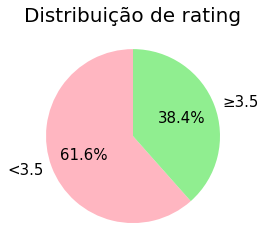

In [18]:
a = dados["rating"].value_counts()
plt.pie(a, autopct='%.1f%%',  textprops={'fontsize': 15}, startangle=90, labels=["<3.5","≥3.5"], 
        colors=['lightpink', 'lightgreen'])
plt.title("Distribuição de rating", fontsize=20);

No dataset, aproximadamente 40% dos chocolates têm notas acima de 3.5 e 60% têm notas abaixo de 3.5, sendo uma base de dados aceitável para ser trabalhada.

### local_cia

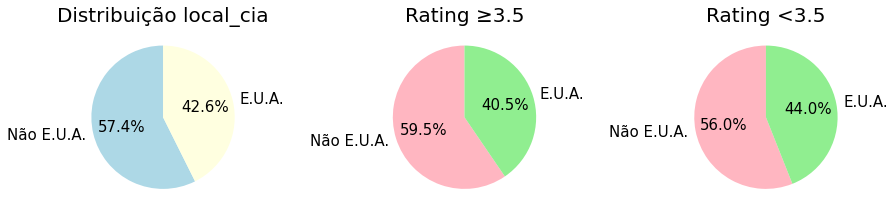

In [19]:
grafico_analise_explo("local_cia", "Não E.U.A.", "E.U.A.", 'lightblue', 'lightyellow', 'lightpink', 'lightgreen')

A distribuição mantêm uma proporção aproximada de 60%/40% em todas as categorias, não havendo uma grande diferença.

### país_grão

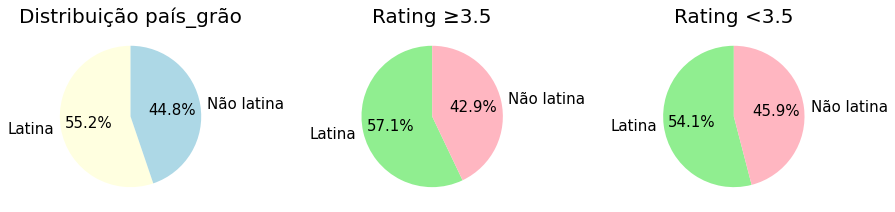

In [20]:
grafico_analise_explo("país_grão", "Latina", "Não latina", 'lightyellow', 'lightblue', 'lightgreen', 'lightpink')

A distribuição mantêm uma proporção aproximada de 55%/45% em todas as categorias, não havendo uma grande diferença.

### %cacau

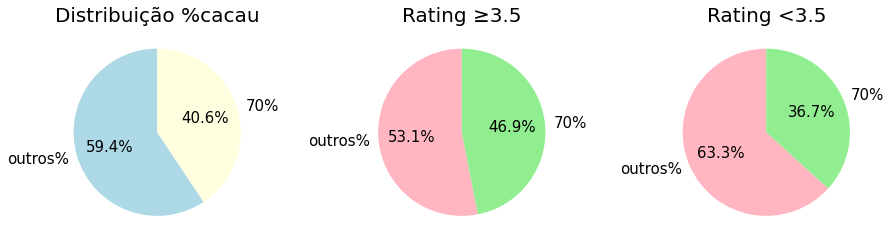

In [21]:
grafico_analise_explo("%cacau", "outros%", "70%", 'lightblue', 'lightyellow', 'lightpink', 'lightgreen')

Aqui vemos uma significativa diferença de quase 10% entre os chocolates com notas acima de 3.5 e os abaixo de 3.5. Pode-se perceber que quando a porcentagem de cacau é diferente de 70% o rating costuma ser baixo.

### num_ingr 

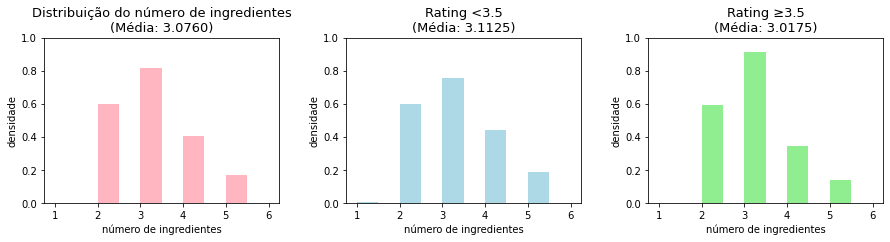

In [22]:
plt.figure(figsize=(13,4))

plt.subplot(131)
media = dados.loc[:,"num_ingr"]
plt.hist(dados.loc[:,"num_ingr"],bins=10,density=True,color="lightpink")
plt.title(f"Distribuição do número de ingredientes\n(Média: {media.mean():.4f})", fontsize=13)
plt.xticks([1, 2, 3, 4, 5, 6],fontsize=10)
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.xlabel("número de ingredientes",fontsize=10)
plt.ylabel("densidade",fontsize=10);

plt.subplot(132)
media = dados.loc[dados.rating==0,"num_ingr"]
plt.hist(dados.loc[dados.rating==0,"num_ingr"],bins=10,density=True,color="lightblue")
plt.title(f"Rating <3.5\n(Média: {media.mean():.4f})", fontsize=13)
plt.xticks([1, 2, 3, 4, 5, 6],fontsize=10)
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.xlabel("número de ingredientes",fontsize=10)
plt.ylabel("densidade",fontsize=10)

plt.subplot(133)
media = dados.loc[dados.rating==1,"num_ingr"]
plt.hist(dados.loc[dados.rating==1,"num_ingr"],bins=10,density=True,color="lightgreen")
plt.title(f"Rating ≥3.5\n(Média: {media.mean():.4f})", fontsize=13)
plt.xticks([1, 2, 3, 4, 5, 6],fontsize=10)
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.xlabel("número de ingredientes",fontsize=10)
plt.ylabel("densidade",fontsize=10)

plt.tight_layout(pad=3)
plt.show()

Percebe-se que há um consideravel valor nos números de ingredientes 3 e 4. Se o número de ingredientes for igual a 3, o chocolate tende a ter um rating acima de 3.5 e quando o número de ingredientes for igual a 4, o rating tende a ser abaixo de 3.5.

### manteiga_cacau

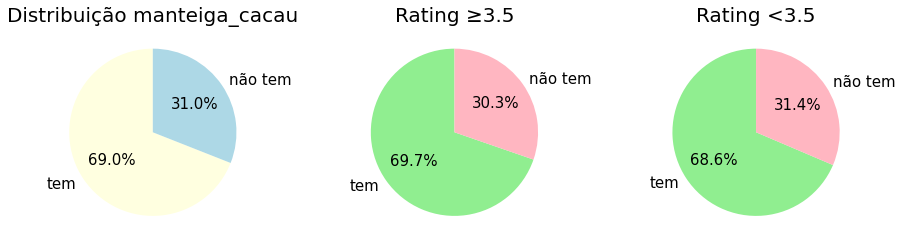

In [23]:
grafico_analise_explo("manteiga_cacau", "tem", "não tem", 'lightyellow', 'lightblue', 'lightgreen', 'lightpink')

A distribuição mantêm uma proporção aproximada de 70%/30% em todas as categorias, não havendo uma grande diferença.

### baunilha

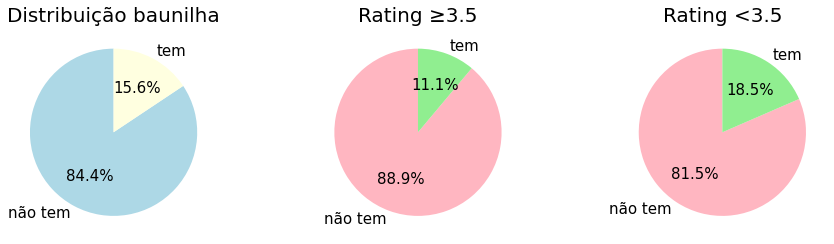

In [24]:
grafico_analise_explo("baunilha", "não tem", "tem", 'lightblue', 'lightyellow', 'lightpink', 'lightgreen')

Aqui vemos novamente uma significativa diferença de quase 10% entre os chocolates com notas acima de 3.5 e os abaixo de 3.5. Pode-se perceber que quando há baunilha na composição do chocolate o rating costuma ser baixo e vice-versa.

### lecitina

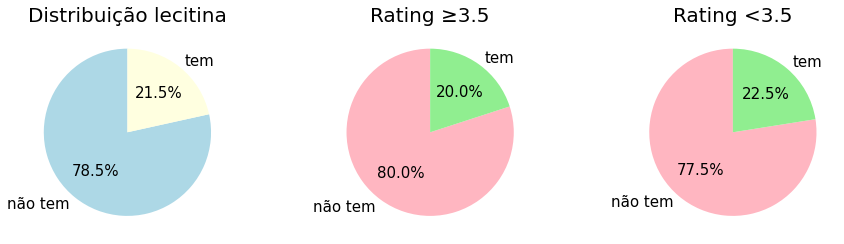

In [25]:
grafico_analise_explo("lecitina", "não tem", "tem", 'lightblue', 'lightyellow', 'lightpink', 'lightgreen')

A distribuição mantêm uma proporção aproximada de 80%/20% em todas as categorias, não havendo uma grande diferença.

### 1_sabor

In [26]:
pd.crosstab(dados.rating, dados["1_sabor"], margins=True, normalize="index").round(4)*100

1_sabor,acido,amargo,arenoso,complexo,doce,gorduroso,salgado
rating,,,,,,,
0.0,7.89,14.76,18.41,11.47,23.45,14.17,9.86
1.0,9.59,14.27,7.37,13.68,37.78,8.07,9.24
All,8.54,14.57,14.16,12.32,28.96,11.83,9.62


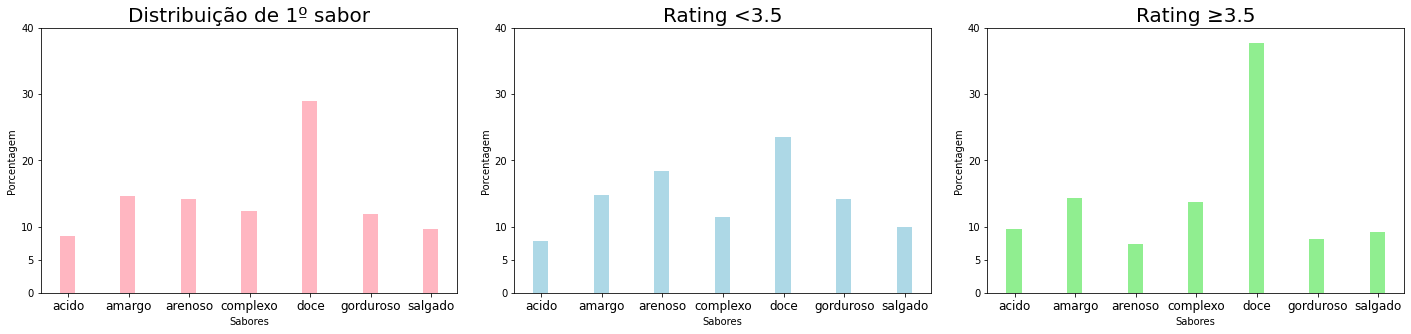

In [27]:
l= [[8.54,14.57,14.16,12.32,28.96,11.83,9.62],
    [7.89,14.76,18.41,11.47,23.45,14.17,9.86],
    [9.59,14.27,7.37,13.68,37.78,8.07,9.24]
   ]

plt.figure(figsize=(20,5))

plt.subplot(131)
largura = 0.25
c = np.arange(len(l[0]))
plt.bar(c, l[0], color="lightpink", width=largura)
plt.xticks([i+0.01 for i in range(len(l[0]))],["acido", "amargo", "arenoso", "complexo", "doce", "gorduroso", "salgado"]
           ,fontsize=12)
plt.yticks([0,5,10,20,30,40])
plt.xlabel("Sabores")
plt.ylabel("Porcentagem")
plt.title(f"Distribuição de 1º sabor",fontsize=20)

plt.subplot(132)
largura = 0.25
c = np.arange(len(l[1]))
plt.bar(c, l[1], color="lightblue", width=largura)
plt.xticks([i+0.01 for i in range(len(l[1]))],["acido", "amargo", "arenoso", "complexo", "doce", "gorduroso", "salgado"]
           ,fontsize=12)
plt.yticks([0,5,10,20,30,40])
plt.xlabel("Sabores")
plt.ylabel("Porcentagem")
plt.title(f"Rating <3.5",fontsize=20)

plt.subplot(133)
largura = 0.25
c = np.arange(len(l[2]))
plt.bar(c, l[2], color="lightgreen", width=largura)
plt.xticks([i+0.01 for i in range(len(l[2]))],["acido", "amargo", "arenoso", "complexo", "doce", "gorduroso", "salgado"]
           ,fontsize=12)
plt.yticks([0,5,10,20,30,40])
plt.xlabel("Sabores")
plt.ylabel("Porcentagem")
plt.title(f"Rating ≥3.5",fontsize=20)

plt.tight_layout(pad=2) ;

Percebe-se que o sabor doce é majoritário em ambos, mas é bem mais discrêpante nos chocolates com rating maior que 3.5, tendo nos chocolates com nota abaixo de 3.5 uma maior uniformidade entre os sabores. Vale destacar os sabores arenoso e gorduroso que aparecem bastante nos chocolates com rating abaixo de 3.5 e bem menos nos com rating mais elevado.

# Modelos de predição

## 1. Decision  Tree

O decision Tree ou árvore de decisão é uma ferramenta utilizada para tomar decisões. A partir de um conjunto de eventos anteriores é possível deduzir um próximo acontecimento, como se fosse uma espécia de ramificação de dados. Para que isso seja feito é necessário fazer várias divisões dos dados em subconjuntos, sendo que não é limitado pelo modelo da base, ou seja, consegue manipular variáveis numéricas e categóricas. Dessa forma os dados vão ficando cada vez mais "limpos e puros". Essas informações vão se tornando cada vez mais lapidadas a medida em que elas contenhão menos classes ou apenas uma. Como por exemplo, o que a gente fez com a coluna de sabores a qual possuia mais de 456 variáveis diferentes e diminuimos ela para apenas 5, após isso criamos uma coluna específica para cada tipo a qual armazenava apenas um estilo de informação, se possuia ou não esse sabor.

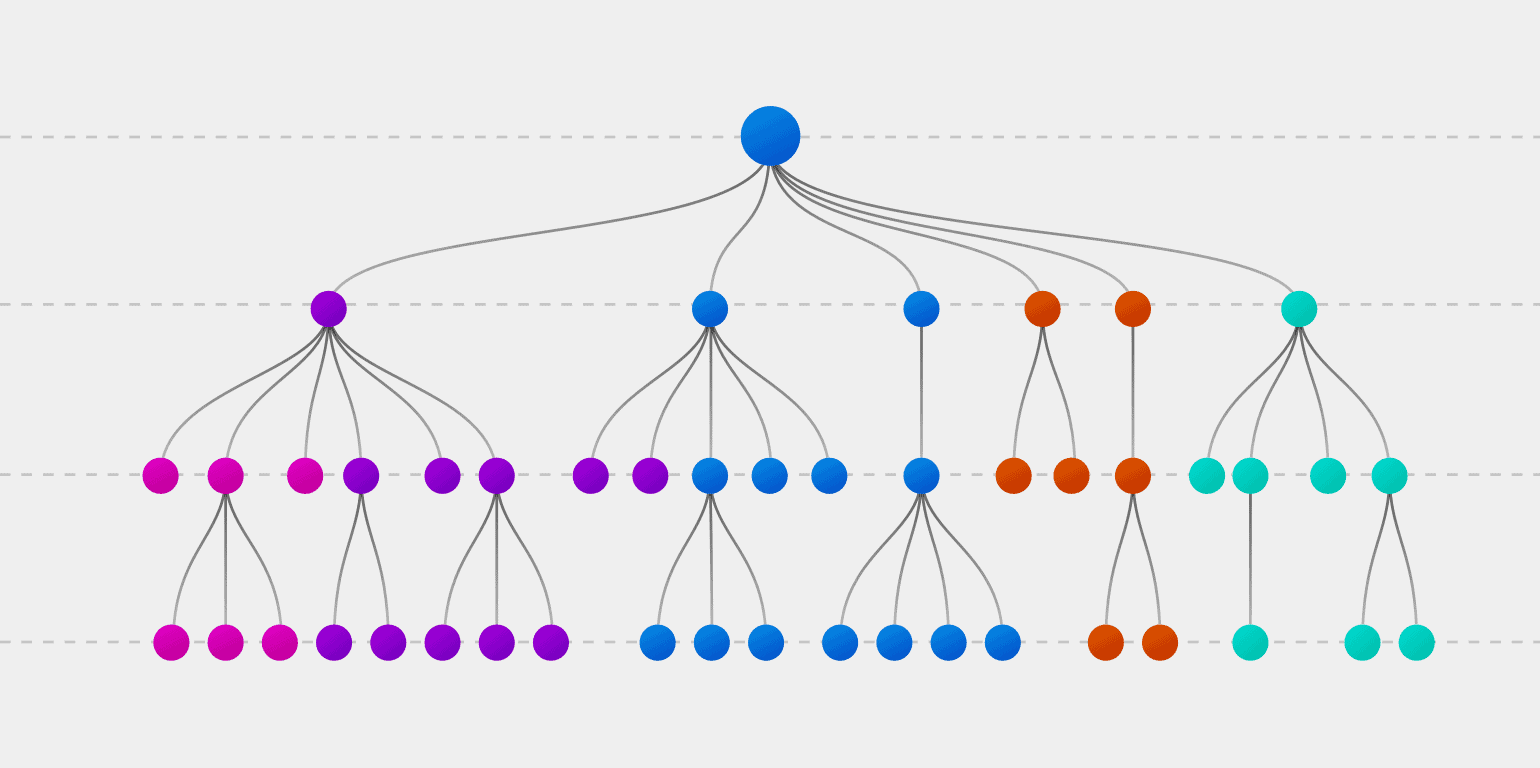

Fonte: [Explorium](https://www.explorium.ai/blog/the-complete-guide-to-decision-trees/)

### Entropia e ganho de informação

Para que seja possível utilizar o método da Decision Tree é necessário que a nossa variável target seja binária, ou seja, se demonstra a ocorrência de um fato ou não. Com isso, precisamos entender dois conceitos a Entropia e o Ganho de Informações.

O Primeiro é um meio para se medir a probabilidade de um evento ocorra a partir de uma seleção aleatória de subconjuntos de informações.

O segundo ocorre quando uma nova subdivisão dos dados provoca uma redução nas respostas possíveis.

Para que esses conceitos não fiquem muito abstratos aqui está um exemplo retirado de "Ciência & Negócios":

"Imagine, inicialmente, que uma moeda é totalmente viesada para cair sempre “cara”. O resultado será então compeltamente previsível, o que indica que não há ganho de informação na realizacão de um experimento como este. Ou seja, não há surpresas nos resultados possíveis.

Porém, se a moeda for um pouco menos viesada e vierem a cair mais de 50% de caras do que coroas, então há uma certa surpresa nos resultados, o que gera um ganho de informação.

Contudo, se toda vez que jogarmos a moeda cair apenas coroa, então voltamos a uma situação de zero entropia, em que não há surpresas.

Portanto, neste exemplo das moedas, a situação em que há maior entropia, ou maior nível de surpresa, ocorre quando a moeda é totalmente justa e o resultado do jogo de moedas não é previsível (apenas sabemos que os resultados possíveis recaem sobre cara ou coroa)."

### Vantagens

- A visualização de uma árvore de decisão é muito intuitiva e de fácil entendimento de suas decisões.

- A árvore de decisão identifica rapidamente a importância das variáveis e as atribui um peso que facilita o reconhecimento da relação entre dois ou mais elementos.

- Requer pouca limpeza de dados, ou seja, menos necessidade de manipulação de dados para o modelo funcionar.

###  Desvantagens

- Overfitting: Sabe-se que a amostra apresenta desvios causados por erros de medição ou fatores aleatórios. Quando o modelo se adequa a essas caracteristicas particulares, ocorre o overfitting, o que causa, dependendo da profundidade da árvore, com que o modelo comece a perder acurácia.

### Implementação

In [28]:
# Ajeitando o dataframe para todos os valores serem binários
dados_bi=pd.get_dummies(data=dados,columns=["1_sabor", "num_ingr"])

In [29]:
feature = ['local_cia', 'país_grão', '%cacau', 'num_ingr_1', "num_ingr_2", "num_ingr_3", "num_ingr_4", "num_ingr_5", 
           "num_ingr_6",'manteiga_cacau', 'baunilha', 'lecitina','1_sabor_acido', '1_sabor_amargo', '1_sabor_arenoso',
           '1_sabor_complexo', '1_sabor_doce','1_sabor_gorduroso', '1_sabor_salgado']
f = dados_bi[feature]
t = dados_bi.rating

In [30]:
# Separando o dataset em treinamento e teste
f_train, f_test, t_train, t_test = train_test_split(f, t, test_size=0.3, random_state=1)

In [31]:
# Treina o classificador
classificador_dt = DecisionTreeClassifier(criterion= "entropy")
classificador_dt.fit(f_train, t_train)
t_previsao=classificador_dt.predict(f_test)

In [32]:
# Acurácia do modelo
print(f"Accuracy: {round((metrics.accuracy_score(t_test, t_previsao)*100), 2)}%")

Accuracy: 61.53%


### Validação por matriz de confusão

A matriz de confusão fornece as seguintes categorias:

- **Verdadeiro positivo (VP)**: Predição acertou. Quando a informação é verdadeira e o modelo previu verdade, por exemplo o chocolate tem o rating acima de 3.5 e o modelo previu que o rating era maior que 3.5.
- **Falso positivo (FP)**: Predição errou. Quando a informação é falsa e o modelo previu verdade, por exemplo o chocolate tem o rating abaixo de 3.5 e o modelo previu que o rating era maior que 3.5.
- **Verdadeiro negativo (VN)**: Predição errou. Quando a informação é verdadeira e o modelo previu falso, por exemplo o chocolate tem o rating acima de 3.5 e o modelo previu que o rating era menor que 3.5.
- **Falso negativo (FN)**: Predição acertou. Quando a informação é falsa e o modelo previu falso, por exemplo o chocolate tem o rating abaixo de 3.5 e o modelo previu que o rating era menor que 3.5.

In [33]:
# Função para matriz de confusão
def matriz_de_conf(classificador, x_test, y_test, cor):
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_confusion_matrix(classificador, x_test, y_test, normalize="all", display_labels=['Negativo', 'Positivo'], cmap=cor,
                          ax=ax,values_format='.2%')
    plt.xlabel("Previsão", fontsize=14)
    plt.ylabel("Verdadeiro", fontsize=14)
    plt.title("Matriz de confusão")

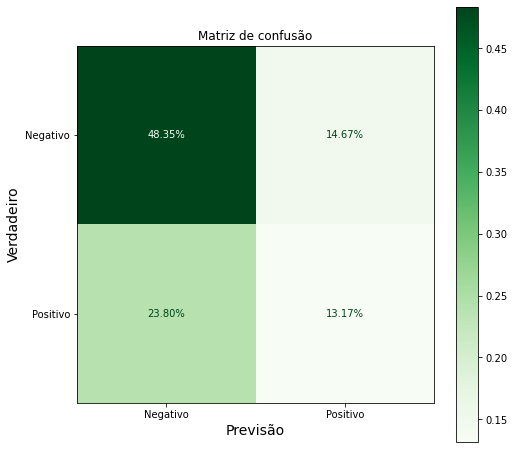

In [34]:
# Matriz de confusão 
matriz_de_conf(classificador_dt, f_test, t_test,"Greens")

Pela matriz de confusão tivemos um acerto de 61,52%.

## 2. Random Forest Classifier

Random forest é um aperfeiçoamento do Decision Tree, ou seja, cria diversas árvores de decisão, mas agora de forma aleatória e não por ganho de informação, e as combina com o objetivo de obter uma maior acurária. 

Outra diferença entre os modelos, é que o modelo anteriormente utilizado pode sofrer com o overfitting, já o modelo atual evita o sobreajuste na maior parte dos casos, visto que trabalha com inúmeras árvores de decisões menores. E pelo fato do programa possuir inúmeros resultados e convergir para os mais populares, o modelo também evita o problema de underfitting e consequentemente obtém uma maior precisão e acertividade. 

Fonte: [TechTour](https://www.youtube.com/watch?v=goPiwckWE9M)

### Vantagens

- Por construir cada árvore de forma aleatória e selecionar as mais populares se diminui o overfitting e o underfitting

- Altamente precisa por conta da quantidade de árvora contidas no processo

- Pode ser utilizado tanto para problemas de regressão quanto para classificação

### Desvantagens

- Difícil interpretação da floresta, diferentemente do Decision tree, onde conseguia seguir facilmente a decisão da árvore

- O processo de manipulação dos dados torna a computação mais pesada e lenta

### Implementação

In [35]:
# Ajeitando o dataframe para todos os valores serem binários
dados_bi=pd.get_dummies(data=dados,columns=["1_sabor", "num_ingr"])

In [36]:
feature = ['local_cia', 'país_grão', '%cacau', 'num_ingr_1', "num_ingr_2", "num_ingr_3", "num_ingr_4", "num_ingr_5", 
           "num_ingr_6",'manteiga_cacau', 'baunilha', 'lecitina','1_sabor_acido', '1_sabor_amargo', '1_sabor_arenoso',
           '1_sabor_complexo', '1_sabor_doce','1_sabor_gorduroso', '1_sabor_salgado']
F = dados_bi[feature]
T = dados_bi.rating

In [37]:
# Separando o dataset em treinamento e teste
F_train, F_test, T_train, T_test = train_test_split(F, T, test_size=0.3, random_state=0)

In [38]:
# Treina o classificador
classificador_rf = RandomForestClassifier(n_estimators=16, random_state=0)
classificador_rf.fit(F_train, T_train)
T_previsto = classificador_rf.predict(F_test)

In [39]:
# Acurácia do modelo
print(f"Acuracia: {round(metrics.accuracy_score(T_test, T_previsto)*100,2)}%")

Acuracia: 63.47%


### Validação por matriz de confusão

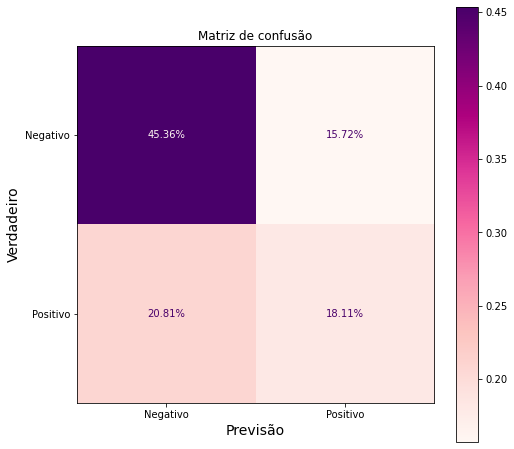

In [40]:
# Matriz de confusão - Random forest
matriz_de_conf(classificador_rf, F_test, T_test, "RdPu")

Pela matriz de confusão tivemos um acerto de 63,47%.

# Conclusão

### Comparando os modelos de predição

**Acurácia:**

Decision Tree: 61,52%

Random Forest: 63,47%

**Matriz de confusão**

Decision Tree: $\qquad$ Random Forest:

VP: 13,52% $\qquad$$\qquad$ VP: 18,11%

FP: 14,67% $\qquad$$\qquad$ FP: 15,72%

VN: 23,65% $\qquad$$\qquad$ VN: 20,81%

FN: 48,35% $\qquad$$\qquad$ FN: 45,36%

Pode-se perceber que o modelo Random Forest foi levemente mais preciso que o Decision Tree, o que é o esperado pela sua característica de ser vários Decision Trees e resolver alguns dos problemas desse. Vale ressaltar que ambos os modelos tenderam as suas classificações para o negativo, ou seja, para o chocolate com rating menor que 3.5, algo que também foi esperado visto que a base de dados é composta por 60% desse tipo.

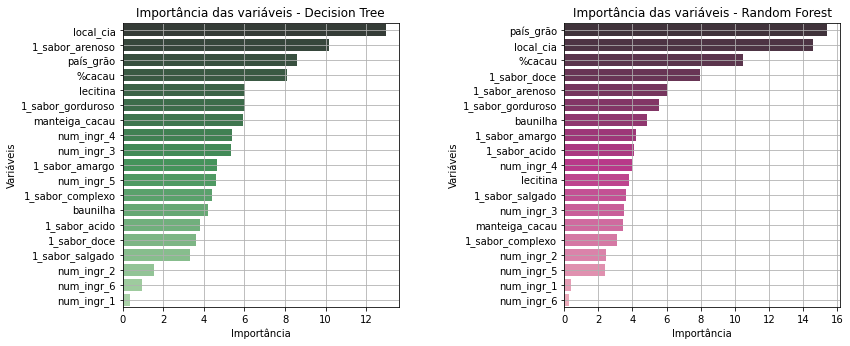

In [41]:
# Ver o peso das variaveis nos modelos 
importancia_dt = pd.Series(classificador_dt.feature_importances_, index=feature).sort_values(ascending=False).round(5)*100
importancia_rf = pd.Series(classificador_rf.feature_importances_, index=feature).sort_values(ascending=False).round(5)*100

plt.figure(figsize=(13,6))

plt.subplot(121)
sns.barplot(importancia_dt, importancia_dt.index, palette="Greens_d")
plt.title("Importância das variáveis - Decision Tree")
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.grid(True)


plt.subplot(122)
sns.barplot(importancia_rf, importancia_rf.index, palette="RdPu_d")
plt.title("Importância das variáveis - Random Forest")
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.grid(True)

plt.tight_layout(pad=5);

Pelo gráfico de importância de variáveis do Decision Tree é possível perceber que a porcentagem de cacau, o sabor arenoso e gorduroso e o número de ingredientes 4 têm um peso maior na classificação, algo que pode ser explicado pela análise descritiva feita anteriormente. Vale notar que o local da companhia e o país de origem do grão também indicam alta relevância, mostrando que uma discrêpancia em torno 5% nessas categorias entre o os chocolates com rating maior que 3.5 e os abaixo de 3.5 já é suficiente para diferencia-los, apesar de não ser muito claro na análise exploratória.

Já para o modelo de Random Forest, a porcentagem de cacau, os sabores arenoso e gorduroso ainda apresentam certa relevância como previsto e o país de origem do grão e o local da companhia também pesam bastante na decisão. Nota-se que o grande diferencial desse modelo para o outro seria o sabor doce. No Decision Tree esse sabor era uma das variáveis menos relevantes e no Random Forest ocorre o contrário. Na nossa análise o sabor doce realmente era um diferencial entre os chocolates, sendo bem mais predominante nos com rating acima de 3.5 e por conta do Random Forest ser mais preciso, o modelo deve ter percebido essa diferença e a utilizado para uma análise mais certeira.

De forma geral os modelos tiveram um acerto moderado em torno de 60% e as nossas hipóteses da analíse exploratória foram comprovadas com os gráficos de importância das variáveis.

### Melhorias

Pensamos em duas estratégias de aperfeiçoamento:

- Resolver o overfitting do Decision Tree: no nosso modelo, o Decision Tree cresceu até não ter mais informações para classificar, o que sabemos que causa o problema de overfitting. Então para solucionar poderiamos colocar um limite a árvore para  que esta pare o seu crescimento no seu pico de precisão.

- Melhorar a base de dados: como foi visto, ambos os modelos tenderam a classificação de chocolate com rating abaixo de 3.5. Para resolvermos esse problema poderiamos igualar a quantidade de chocolates de rating acima de 3.5 e os abaixo de 3.5, sendo tanto por remoção ou por incremento de dados.

# Referências

Decision Tree:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html **(documentação)**

https://pt.wikipedia.org/wiki/Sobreajuste

https://www.vooo.pro/insights/um-tutorial-completo-sobre-a-modelagem-baseada-em-tree-arvore-do-zero-em-r-python/

https://www.datacamp.com/community/tutorials/decision-tree-classification-python

http://professorluizalberto.com.br/site/images/2020-1/Python%20%C3%81rvore%20de%20Decis%C3%A3o.pdf

https://cienciaenegocios.com/o-que-e-arvore-de-decisao-decision-tree-linguagem-r/#Como_funciona_uma_arvore_de_decisao

Random Forest:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html **(documentação)**

https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn

https://towardsdatascience.com/understanding-random-forest-58381e0602d2

https://medium.com/machina-sapiens/o-algoritmo-da-floresta-aleat%C3%B3ria-3545f6babdf8